
![](https://i.imgur.com/ZghLZVU.png)


![](https://i.imgur.com/j6FuBvD.jpg)

![](https://i.imgur.com/thaKJ1N.png)

### What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

### Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.

### For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

### Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

![](https://i.imgur.com/Gd1CZrN.png)

### By analyzing these Bangalore house data we will determine the approximate price for the houses.

![](https://i.imgur.com/vl7xtxF.png)

<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #3AB4F2;
              font-size: 100%;
              font-family: Verdana">
    
<p style = "padding: 7px;
            color: Black;">
    <ul> 📌 <b>Area_type</b> - Description of the area<br>
         📌 <b>Availability</b> - When it can be possessed or when it is ready<br>
         📌 <b>Location</b> - Where it is located in Bengaluru<br>
         📌 <b>Size</b> - BHK or Bedrooms<br>
         📌 <b>Society</b> - To which society it belongs<br>
         📌 <b>Total_sqft</b> - Size of the property in sq.ft<br>
         📌 <b>Bath</b> - No. of Bathrooms<br>
         📌 <b>Balcony</b> - No. of the Balcony<br>
         📌 <b>Price</b> - Value of the property in lakhs (Indian Rupee - <b>₹</b>)<br><br>
    <p style = "padding: 3px;
                color: Black;">

![](https://i.imgur.com/VQf9nV2.png)

### 1. The cost of a mis-classification can be high.
### 2. There is strict latency concerns.
### 3. From this project we will able to understand how house prices depend on other factors. 

![](https://i.imgur.com/WPXJm4c.png)

In [151]:
# pip install prettytable

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable


![](https://i.imgur.com/BiP8Vkx.png)


In [153]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


![](https://i.imgur.com/8nbAftN.png)


![](https://i.imgur.com/PuUF8wf.png)


In [154]:
df.shape

(13320, 9)


![](https://i.imgur.com/Jp8eZtk.png)


In [155]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


![](https://i.imgur.com/66TLyXO.png)


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### To know the description about the dataset

In [157]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


#### Checking if there is some null values or not

In [159]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [160]:
df.describe(include=["object", "bool"])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


#### Checking if there is some null values or not (Sum)

In [161]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Performing Group by operation on Area Type

In [162]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Checking what different "Area Types" are present in the Dataset

In [163]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

![](https://i.imgur.com/NoGC4qm.png)

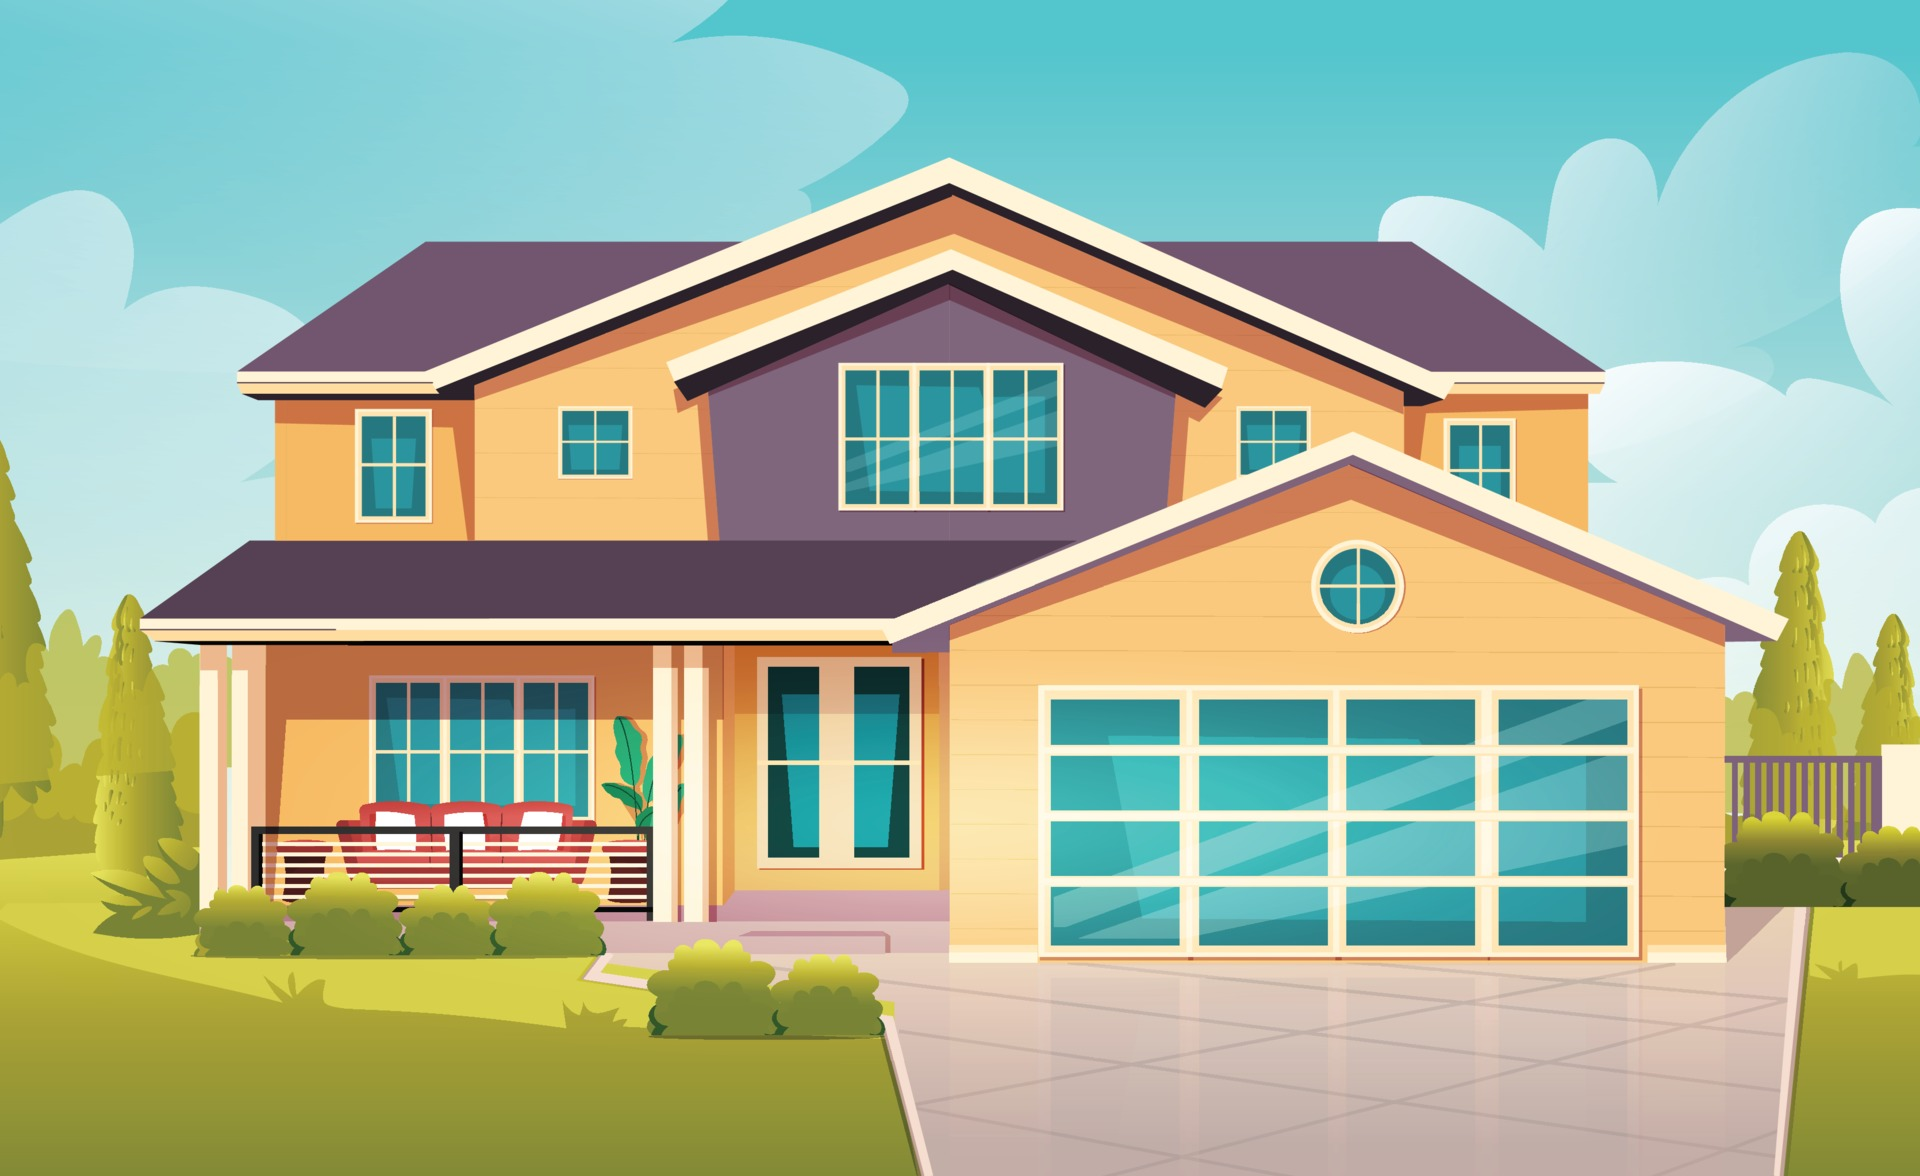

In [164]:
Image("https://i.imgur.com/ZFIFaiN.jpg")

<AxesSubplot: >

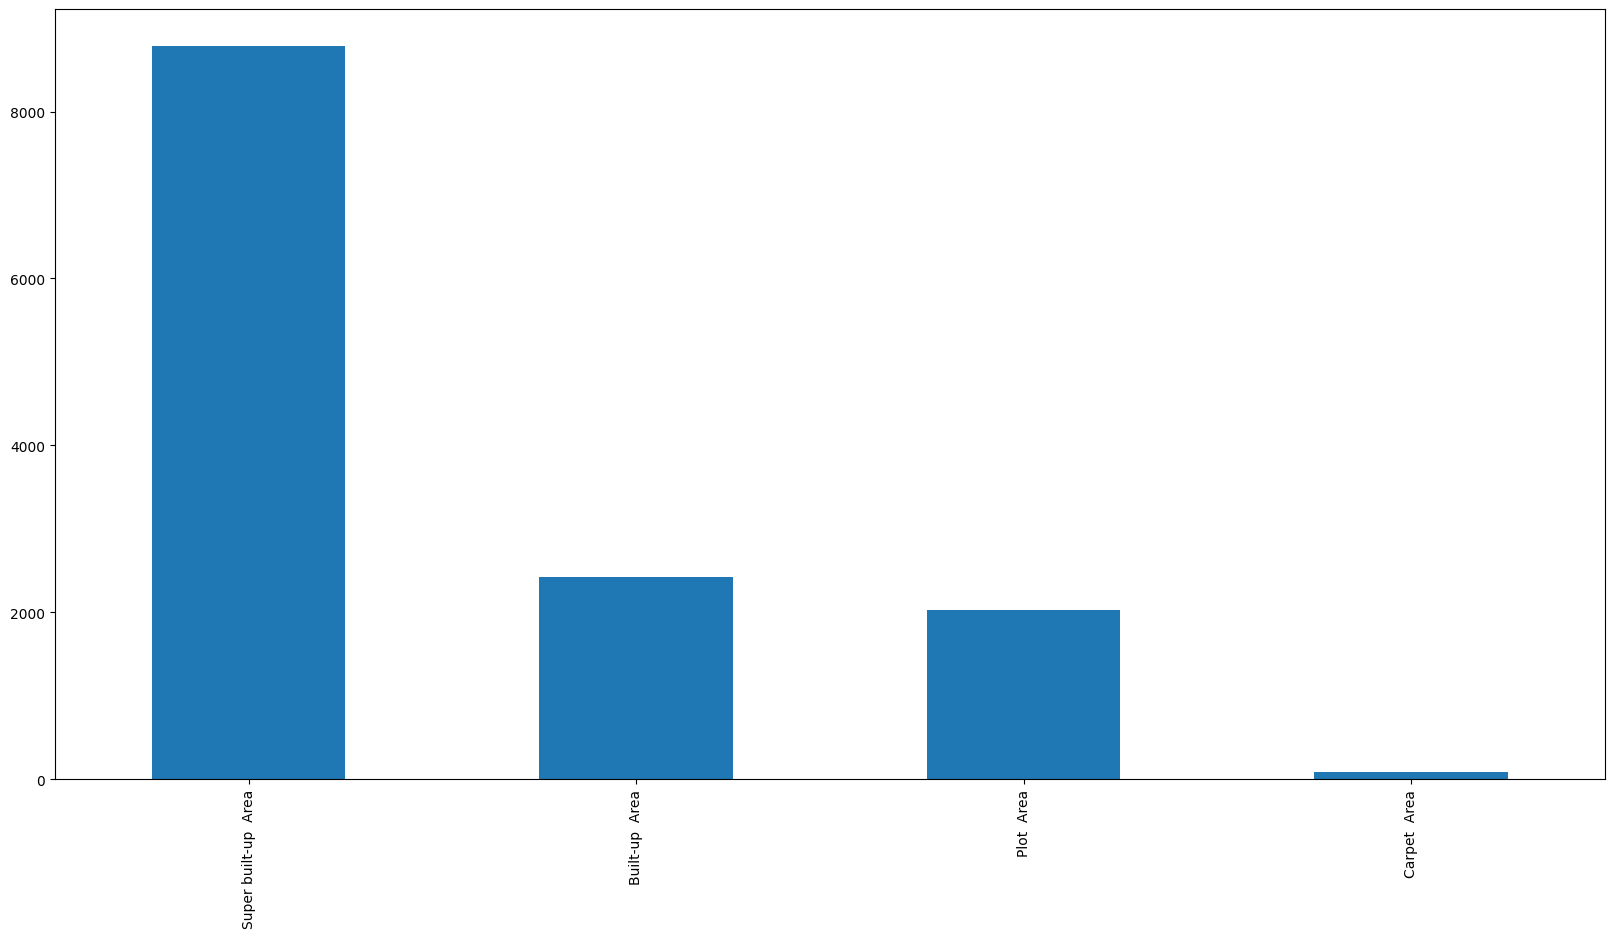

In [165]:
df.area_type.value_counts().plot(kind='bar')

In [166]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<AxesSubplot: >

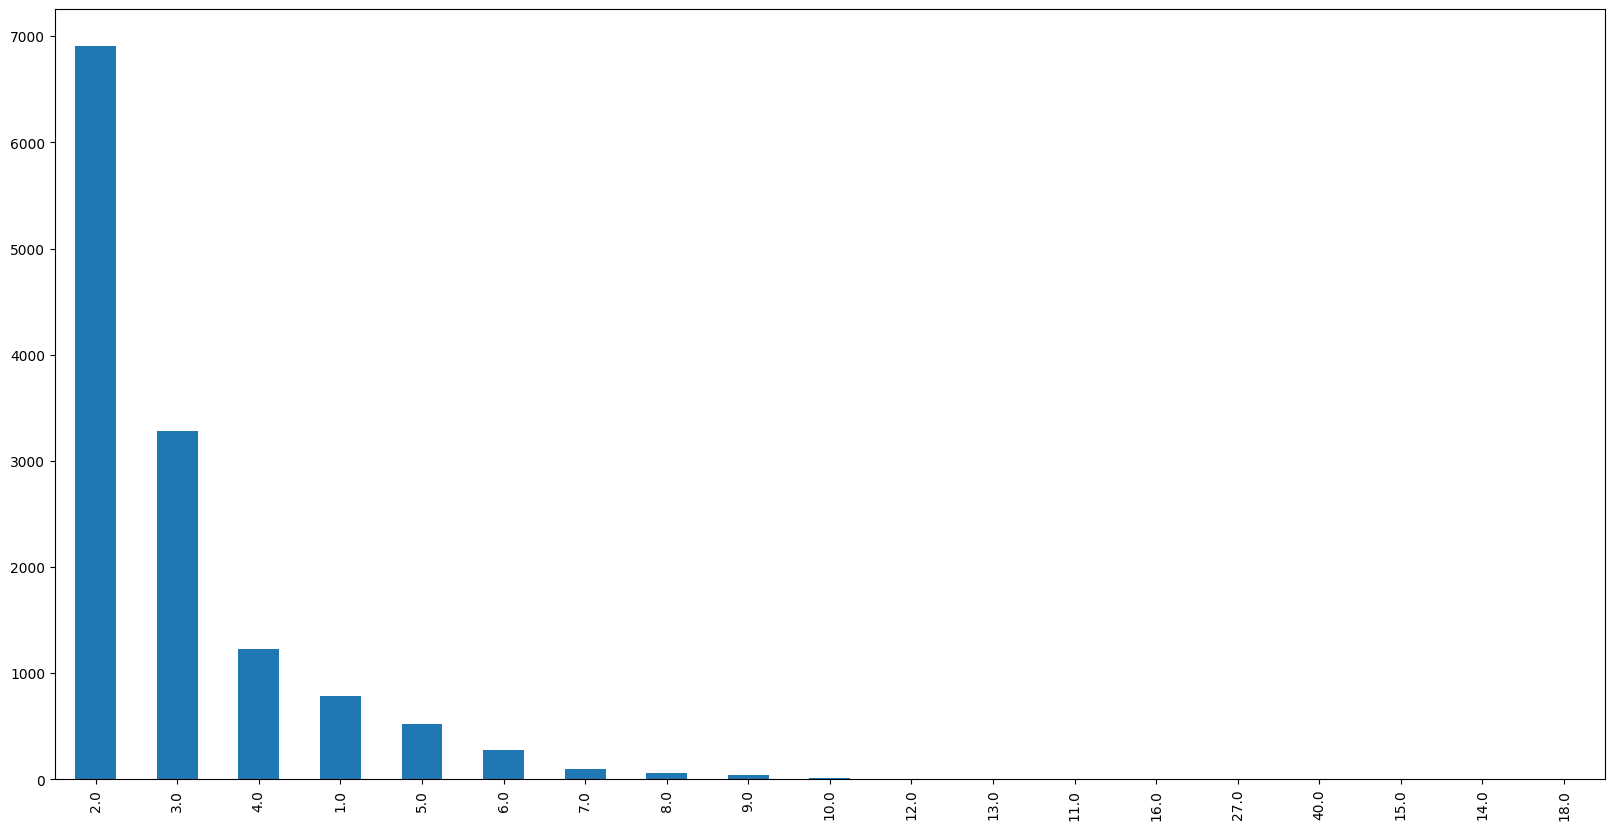

In [167]:
df.bath.value_counts().plot(kind='bar')

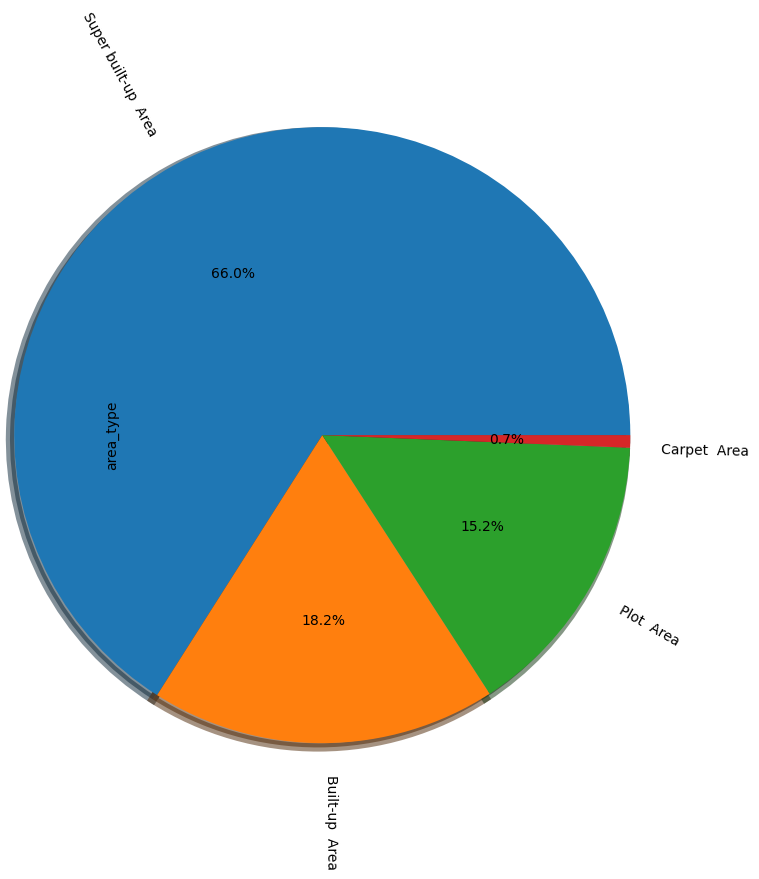

In [168]:
plt.figure(figsize = (7,5))
(df["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

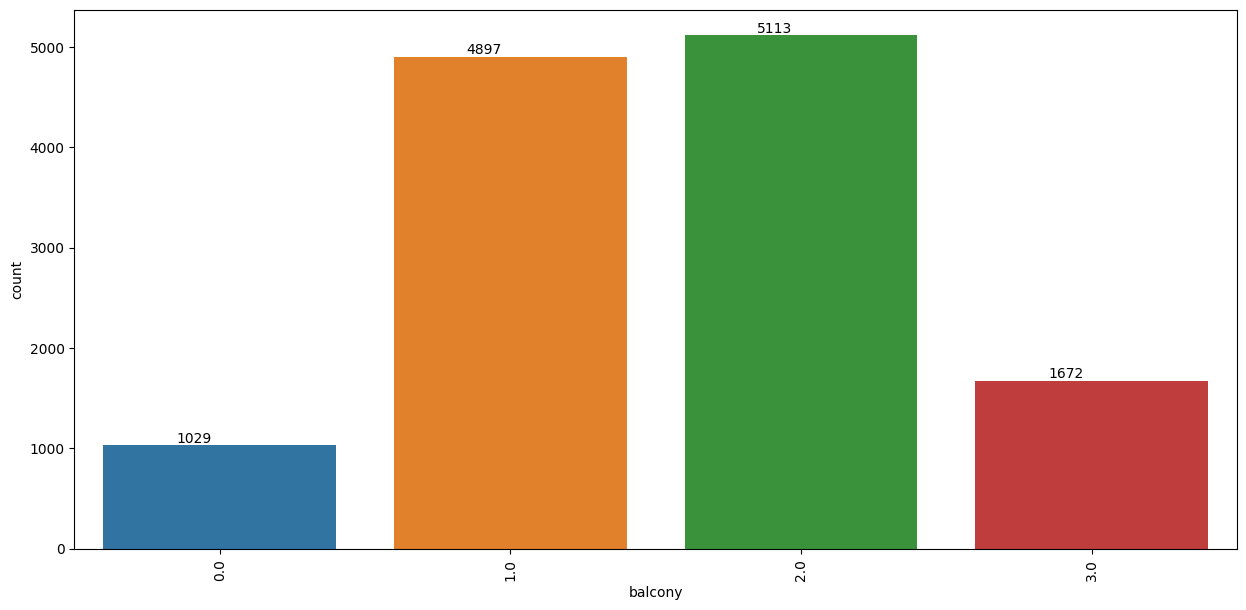

In [169]:
plt.figure(figsize = (15,7))
ax=sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [170]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


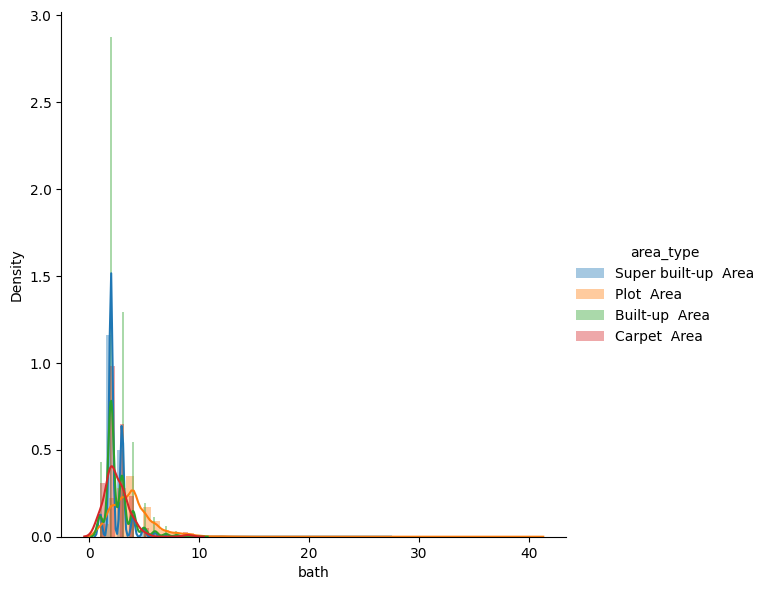

In [171]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

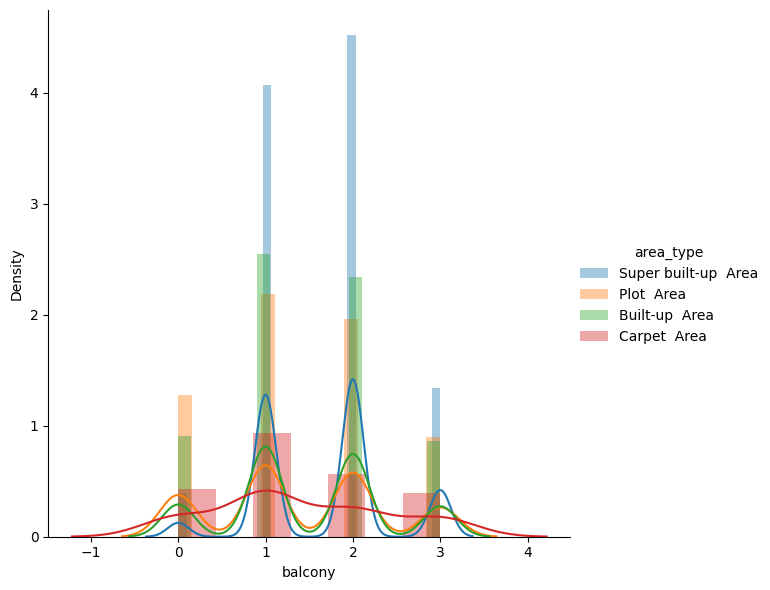

In [172]:
sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

In [173]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


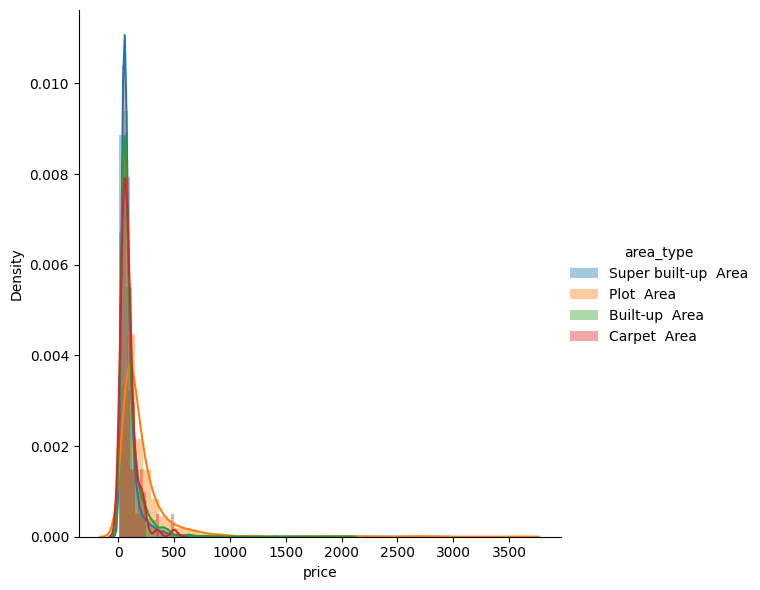

In [174]:
sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'price').add_legend()
plt.show()

#### Dropping less important features

In [175]:
# df = df.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [176]:
df.shape

(13320, 9)

#### Dropping null values

In [177]:
df = df.dropna()

In [178]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 585.6+ KB


![](https://i.imgur.com/bZn8N2J.png)

#### Applying unique function on feature called Size

In [180]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

#### From the above we can clearly see that Bedroom is represented with 2 different methods. One is BHK and the other one is Bedroom. So we are making a new column called BHK and we are discarding all the units (like BHK, Bedroom).

In [181]:
df['BHK'] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [182]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


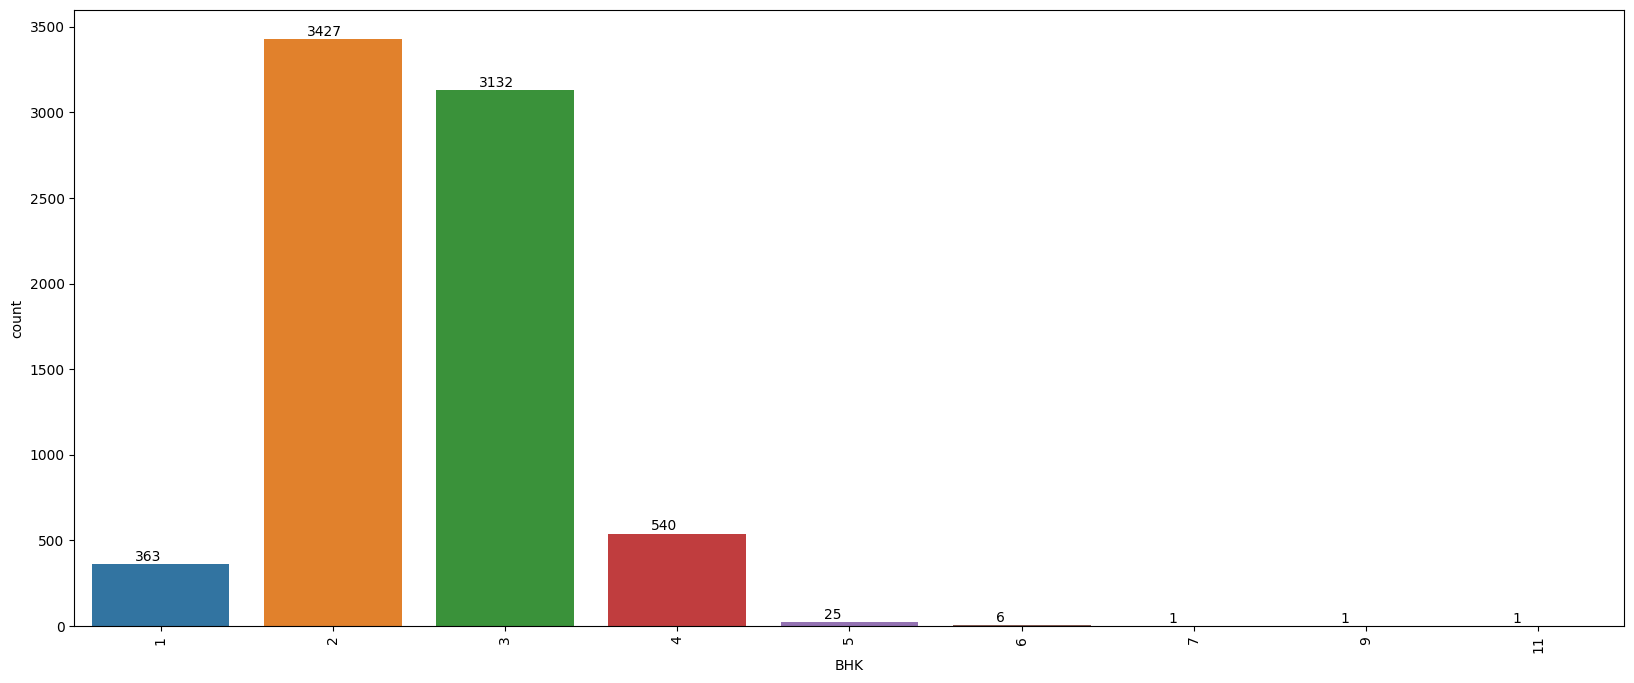

In [183]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [184]:
df.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

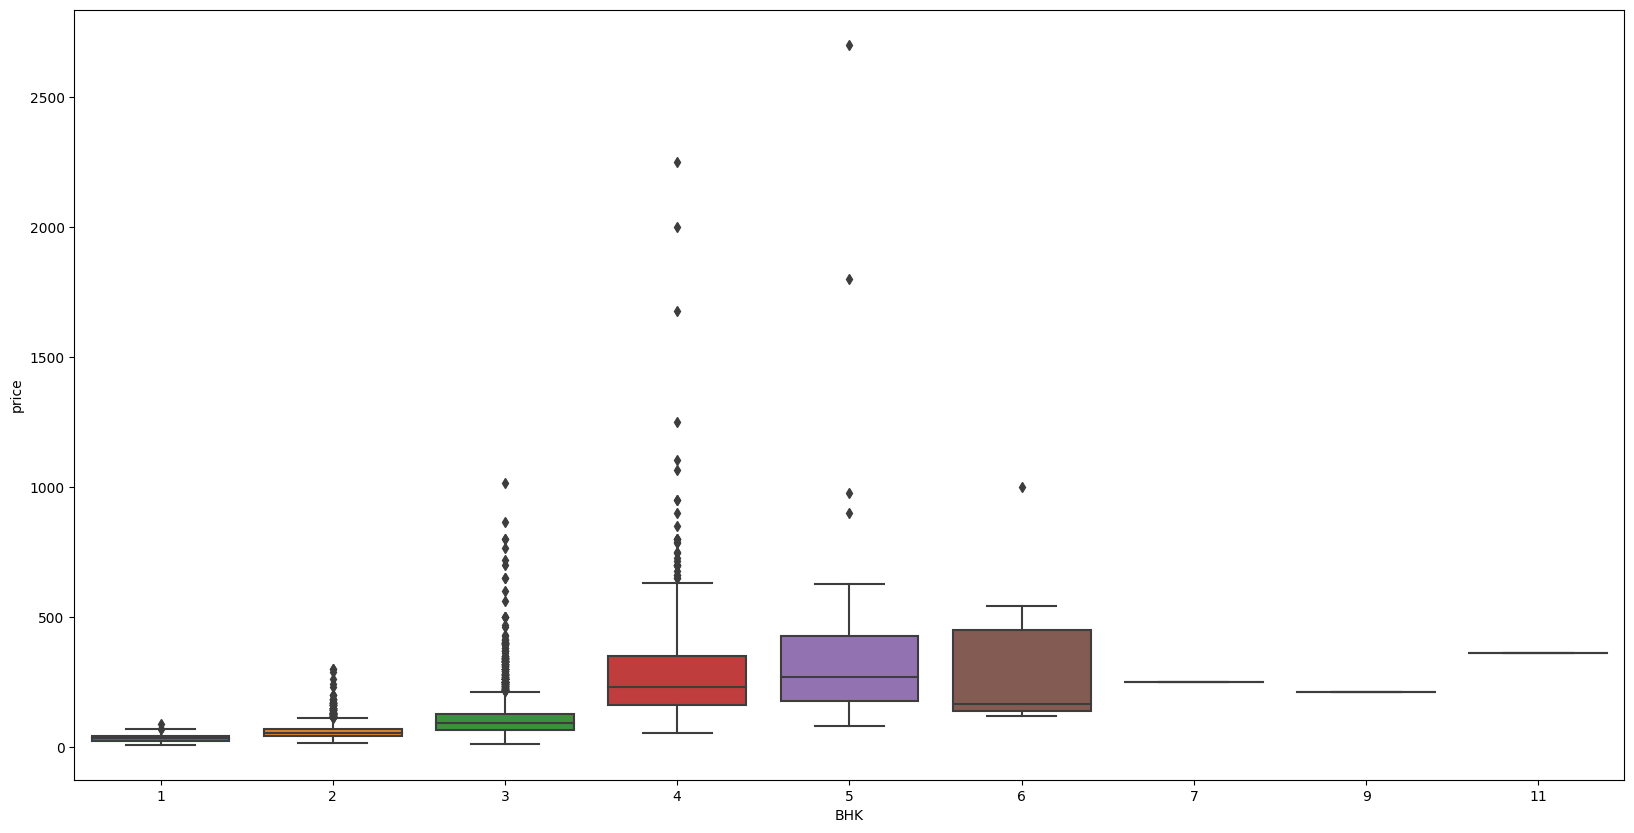

In [185]:
sns.boxplot(x = 'BHK', y = 'price', data = df)
plt.show()

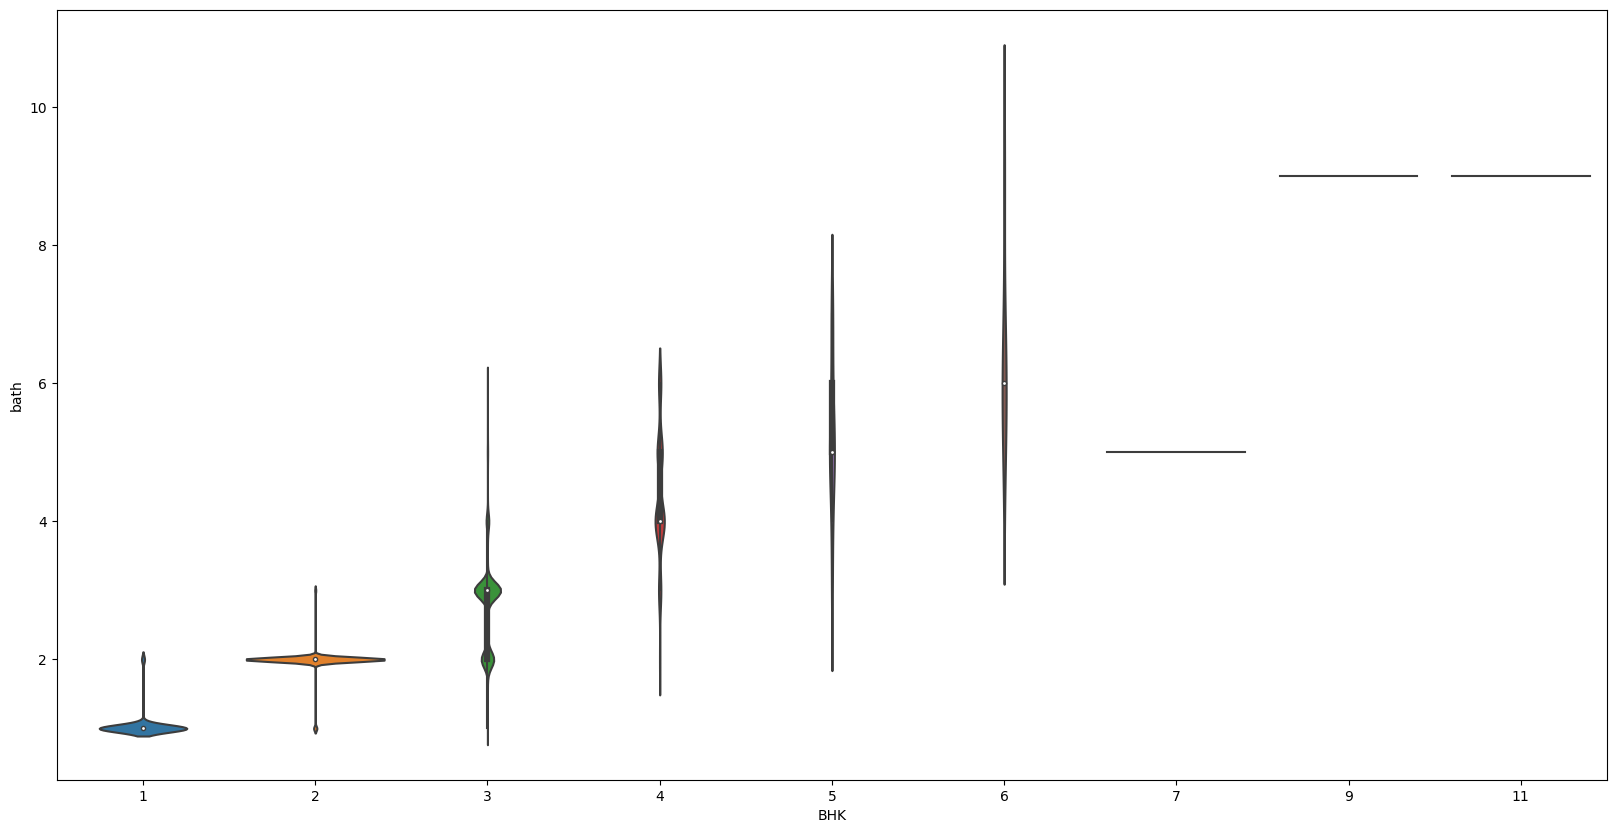

In [186]:
sns.violinplot(x='BHK', y = 'bath', data = df)
plt.show()

In [187]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [188]:
df['total_sqft'].min()

'1000'

#### Exploring total_sqft feature

In [189]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [190]:
df[~df["total_sqft"].apply(is_float)].head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2


#### From the above we can see that total_sqft can be a range (say, 3090-5002). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple.

#### Converting Sq.Ft to Number

In [191]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [192]:
df = df.copy()
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [193]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


#### Here, we are adding a new feature called Price per Square Feet

In [194]:
df = df.copy()
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


#### Here, we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [195]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield         398
Sarjapur  Road     310
Electronic City    238
Kanakpura Road     216
Thanisandra        215
                  ... 
HAL 2nd Stage        1
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
Abshot Layout        1
Name: location, Length: 626, dtype: int64

In [196]:
len(location_stats)

626

In [197]:
len(location_stats[location_stats<=10])

483

In [198]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Jalahalli East     10
Mallasandra        10
Arekere            10
Amruthahalli       10
Rayasandra         10
                   ..
HAL 2nd Stage       1
Adarsh Nagar        1
S R Layout          1
Sadduguntepalya     1
Abshot Layout       1
Name: location, Length: 483, dtype: int64

In [199]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

144

In [200]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


#### Here we will discard some more data. Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [201]:
df[df.total_sqft/df.BHK<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
349,Plot Area,18-Dec,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,Ready To Move,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,Ready To Move,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [202]:
df = df[~(df.total_sqft/df.BHK<300)]
df.shape

(7454, 11)

In [203]:
df["price_per_sqft"].min()

371.42857142857144

In [204]:
df["price_per_sqft"].max()

76530.61224489796

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation

In [205]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(5862, 11)

#### Ploting the Scatter Chart for 2 BHK and 3 BHK properties

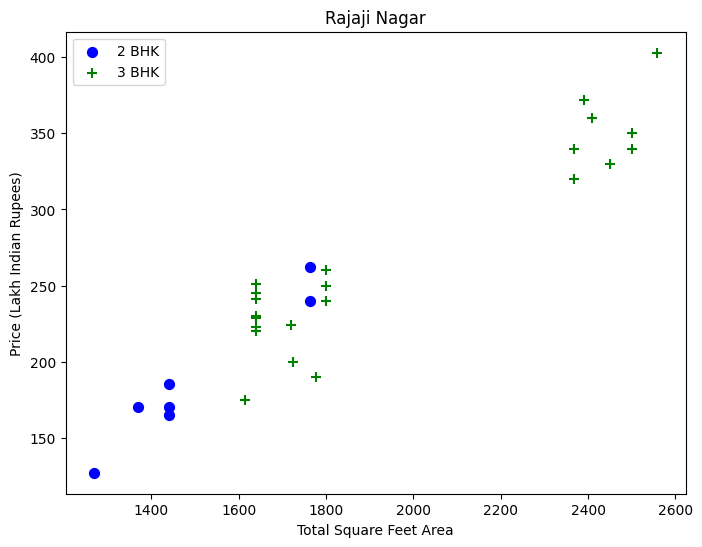

In [206]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

#### Ploting the histogram for Price Per Square Feet vs Count

Text(0, 0.5, 'Count')

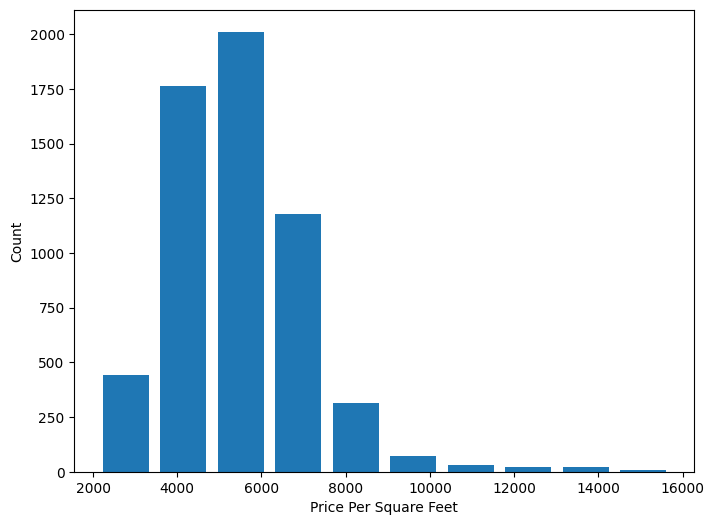

In [207]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Ploting the histogram for Number of bathrooms vs Count

Text(0, 0.5, 'Count')

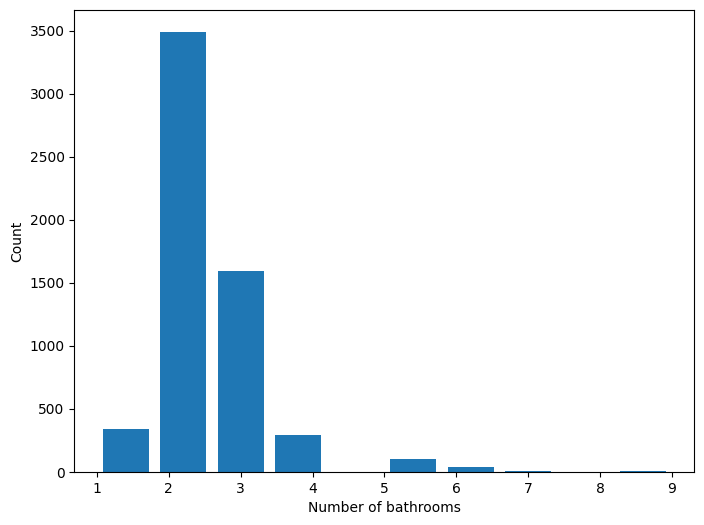

In [208]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [209]:
df[df.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [210]:
df[df.bath>df.BHK+2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
3791,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3,6423.034330
4866,Super built-up Area,Ready To Move,other,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6,8819.897689


In [211]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711


#### Using One Hot Encoding for Location

In [212]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Concatinating both the dataframes together

In [213]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,...,0,0,0,0,0,0,0,0,0,0


In [214]:
df.shape

(5862, 154)

In [215]:
df = df.drop('location',axis='columns')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711,...,0,0,0,0,0,0,0,0,0,0


In [216]:
X = df.drop(['price'],axis='columns')
X.head()

,area_type,availability,size,society,total_sqft,bath,balcony,BHK,price_per_sqft,1st Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,4 BHK,Prhtsok,2825.0,4.0,3.0,4,8849.557522,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,3 BHK,Prhtsok,1875.0,3.0,1.0,3,8906.666667,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,2 BHK,NCaveun,1394.0,2.0,1.0,2,7173.601148,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,2 BHK,Inntsth,1077.0,2.0,2.0,2,8635.097493,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,3 BHK,Inntsth,1590.0,3.0,3.0,3,8238.993711,1,...,0,0,0,0,0,0,0,0,0,0


In [217]:
y = df.price
y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [218]:
X = X.drop(['size'],axis='columns')
X.head()

,area_type,availability,society,total_sqft,bath,balcony,BHK,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,4,8849.557522,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,3,8906.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,NCaveun,1394.0,2.0,1.0,2,7173.601148,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,Inntsth,1077.0,2.0,2.0,2,8635.097493,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,Inntsth,1590.0,3.0,3.0,3,8238.993711,1,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
X = X.drop(['price_per_sqft'],axis='columns')
X.head()

,area_type,availability,society,total_sqft,bath,balcony,BHK,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,NCaveun,1394.0,2.0,1.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,Inntsth,1077.0,2.0,2.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,Inntsth,1590.0,3.0,3.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
X = X.drop(columns=["area_type", "availability", "society"])

In [226]:
X.head()

,total_sqft,bath,balcony,BHK,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,1.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
X.shape

(5862, 147)

![](https://i.imgur.com/lUO8zIo.png)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Columns: 153 entries, area_type to Yeshwanthpur
dtypes: float64(5), int64(1), object(4), uint8(143)
memory usage: 1.2+ MB


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [230]:
lr_clf = LinearRegression()

In [231]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [232]:
lr_clf.score(X_test,y_test)

0.8942744832668954

In [234]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88212009, 0.905585  , 0.90933155, 0.87681652, 0.88940125])

Here we are using Grid Search CV for 3 different types of Regression models:

<b>1. Linear Regression</b>

<b>2. Lasso Regression</b>

<b>3. Decision Tree Regression</b>

![](https://i.imgur.com/EKH21H1.png)

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

![](https://i.imgur.com/dGf4FQS.png)

#### Comparing all the models

In [ ]:
find_best_model_using_gridsearchcv(X,y)

![](https://i.imgur.com/ZfSCUnS.png)

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

#### Here we are predicting the house prices based on Location, Size, Bathroom, and BHK

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [ ]:
predict_price('1st Phase JP Nagar',200, 3, 3)

In [ ]:
predict_price('Indira Nagar',5000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1500, 3, 3)

## References and Acknowledgements

<b> Bengaluru House price data - https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

<b> CodeBasics YouTube Channel - https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ